# Programming Machine Learning Lab
# Exercise 4

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_4.xxx"**
1. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


In [1]:
# imports 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets



### Part 1

**Optimization Routines and Loss Functions**

In this part of the assignment we learn how to write modular programs and make our code reusable. For this, declare a class named $\textbf{Optimization}$ which has 2 inputs X and y as the class variables. Next, implement the following optimization algorithms in this class. 

- Stochastic Gradient Descent (For Mean Square Loss)
- Newton’s Method (For Cross Entropy Loss) 

You will need loss functions and their gradients for the optimization process. So implement a class $\textbf{Loss}$ which also takes in X and y and computes the following losses and their gradients.

- Mean Square Loss (for Regression)
- Cross Entropy Loss (for Classification)
    
Make the $\textbf{Loss}$ class such that you can access it from the $\textbf{Optimization}$ class.

*Note : You can use np.linalg.solve for solving linear equations*

In [2]:
class Loss:
    def __init__(self):
        self.history_train = []
        self.history_test = []

    def mean_square_loss(self, x, y, theta, x_test, y_test):
        # Mean Square Loss for Regression
        predictions = np.dot(x, theta)
        mse = np.mean((predictions - y) ** 2)
        self.history_train.append(mse)
        self.history_test.append(
            np.mean((np.dot(x_test, theta) - y_test) ** 2)
        )
        return mse

    def mean_square_loss_gradient(self, x, y, theta):
        # Gradient of Mean Square Loss for Regression
        gradient = 2 * np.dot(x.T, (np.dot(x, theta) - y))  / len(y)
        return gradient

    def cross_entropy_loss(self, x, y, theta, x_test, y_test):
        # Cross Entropy Loss for Classification
        m = len(y)
        h_theta = self.sigmoid(np.dot(x, theta))
        cost = (-1 / m) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
        self.history_train.append(cost)
        self.history_test.append(
            (-1 / len(y_test)) * np.sum(y_test * np.log(self.sigmoid(np.dot(x_test, theta))) + (1 - y_test) * np.log(1 - self.sigmoid(np.dot(x_test, theta))))
        )
        return cost

    def cross_entropy_loss_gradient(self, x, y, theta):
        # Gradient of Cross Entropy Loss for Classification
        m = len(y)
        h_theta = self.sigmoid(np.dot(x, theta))
        gradient = np.dot(x.T, (h_theta - y)) / m
        return gradient

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))


class Optimization:
    def __init__(self, x, y, x_test, y_test):
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.loss = Loss()

    def gradient_descent(self, theta, learning_rate, epochs, batch_size):
        # Gradient Descent for Mean Square Loss
        m = len(self.y)
        for epoch in range(epochs):
            for i in range(0, m, batch_size):
                batch_X = self.x[i:i+batch_size, :]
                batch_y = self.y[i:i+batch_size].reshape(-1, 1)
                loss = self.loss.mean_square_loss(
                    batch_X, batch_y, theta, self.x_test, self.y_test
                )
                gradient = self.loss.mean_square_loss_gradient(
                    batch_X, batch_y, theta
                )
                theta = theta - learning_rate * gradient
        return theta

    def newtons_method(self, theta, epochs):
        for epoch in range(epochs):
            loss = self.loss.cross_entropy_loss(self.x, self.y, theta, self.x, self.y)
            gradient = self.loss.cross_entropy_loss_gradient(self.x, self.y, theta)
            hessian = np.dot(
                    np.dot(self.x.T,
                        np.dot(np.diag(self.loss.sigmoid(theta)), 
                            np.diag(1 - self.loss.sigmoid(theta))
                            )
                    )
                , self.x)
            theta = theta - np.dot(np.linalg.inv(hessian), gradient)
        return theta


### Part 2

In this task, you are given a data set named **"regression.csv"**. 
- Split the dataset into 80% for training and 20% for test
- Check the correlation of features (X) with the target (Y) (Visually as well). 
- Remove the 3 least correlated variables. The correlation is checked only using the train dataset
- Perform standard scaling on the remaining feature Columns

Implement a class $\textbf{LinearRegression}$ that has at least two functions, $\textbf{fit}$ and $\textbf{predict}$ for fitting a linear regression model and predicting the results. You need to use the $\textbf{Optimization}$ and $\textbf{Loss}$ class inside this. Fit a linear regression model with *Mean Square Loss* and *Stochastic Gradient Descent*.

Also, generate the loss trajectory for both training and testing datasets


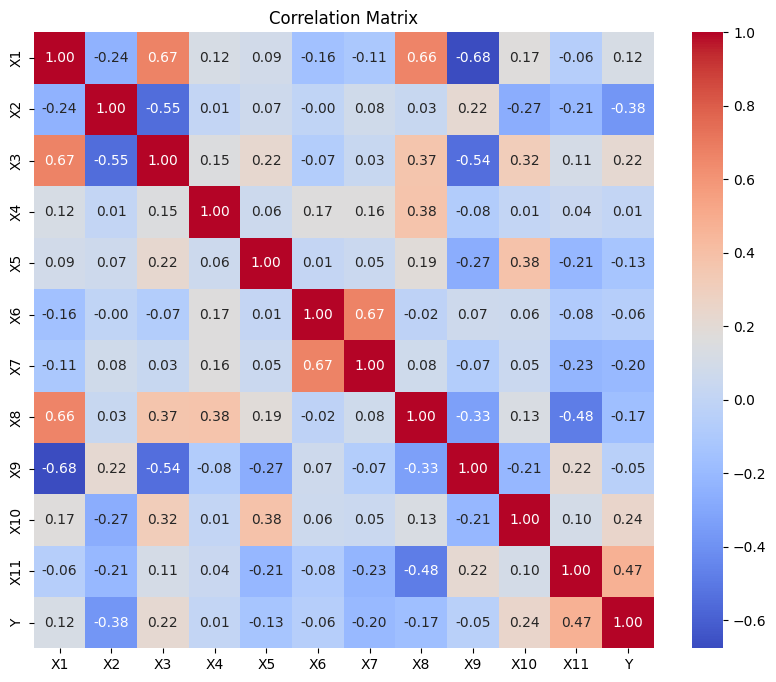

Final validation loss: 0.3924509319295642
Betas: [[ 5.62380258]
 [ 0.08846114]
 [-0.18973263]
 [-0.03379037]
 [-0.07945861]
 [-0.07002951]
 [-0.04420196]
 [ 0.14936152]
 [ 0.28576976]]


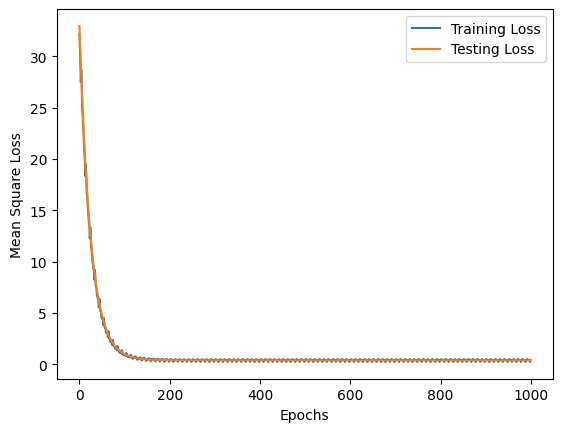

In [4]:
#### Write your code here
# Load the dataset
df = pd.read_csv('regression.csv', header=0, index_col=None)

# Split the dataset into 80% for training and 20% for test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Check the correlation of features with the target
correlation_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_with_target = correlation_matrix['Y'].abs().sort_values(ascending=False)

# Remove the 3 least correlated variables
least_correlated_features = correlation_with_target.tail(3).index
train_df = train_df.drop(least_correlated_features, axis=1)
test_df = test_df.drop(least_correlated_features, axis=1)

# Perform standard scaling on the remaining feature columns
scaler = StandardScaler()
train_df.iloc[:, :-1] = scaler.fit_transform(train_df.iloc[:, :-1])
test_df.iloc[:, :-1] = scaler.transform(test_df.iloc[:, :-1])

# Define the Optimization and Loss classes (as previously provided)

# Linear Regression class
class LinearRegression:
    def __init__(self, x, y, x_test, y_test, learning_rate=0.01, epochs=100, batch_size=128):
        self.x = np.hstack((np.ones((x.shape[0], 1)), x))  # Add a column of ones for the bias term
        self.y = y.reshape(-1, 1)
        self.x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) 
        self.y_test = y_test.reshape(-1, 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self):
        initial_theta = np.zeros((self.x.shape[1], 1))
        self.optimization = Optimization(self.x, self.y, self.x_test, self.y_test)
        self.theta = self.optimization.gradient_descent(initial_theta, self.learning_rate, self.epochs, self.batch_size)

    def predict(self, x):
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        return np.dot(x, self.theta)

# Train a linear regression model
X_train = train_df.iloc[:, :-1].values
y_train = train_df['Y'].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df['Y'].values

linear_reg = LinearRegression(X_train, y_train, X_test, y_test)
linear_reg.fit()

print(f'Final validation loss: {linear_reg.optimization.loss.history_test[len(linear_reg.optimization.loss.history_test) - 1]}')
print(f'Betas: {linear_reg.theta}')

# Plot the loss trajectory for both training and testing datasets
plt.plot(linear_reg.optimization.loss.history_train, label='Training Loss')
plt.plot(linear_reg.optimization.loss.history_test, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Loss')
plt.legend()
plt.show()

**Evaluation**

Compute the test predictions using the Linear Regression from sklearn and compare the Betas and Results to your implementation.

In [10]:
from sklearn.linear_model import LinearRegression

# Scikit-learn Linear Regression
linear_reg_sklearn = LinearRegression()
linear_reg_sklearn.fit(X_train, y_train)
y_pred_sklearn = linear_reg_sklearn.predict(X_test)


print("Scikit-learn Implementation Betas: ", linear_reg_sklearn.coef_)

# Compare predictions
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("Mean Squared Error (Scikit-learn Implementation):", mse_sklearn)

Scikit-learn Implementation Betas:  [ 0.09297637 -0.18951321 -0.0342852  -0.07627814 -0.07051913 -0.04197988
  0.15053825  0.28339376]
Mean Squared Error (Scikit-learn Implementation): 0.3925476726077165


**Point to ponder**

While optimizing the loss function for Linear Regression or Logistic Regression, one needs to initialize the model parameters. It is well known that deep neural networks do not function if the model parameters are initialized to zero. Why is it so? Does this issue also arise while optimizing the loss function for Linear or Logistic Regression? Explain.

The issue with initializing all the model parameters to zero, known as the "symmetry problem," affects not only deep neural networks but also other machine learning models, including linear regression and logistic regression. It's a more general problem related to optimization, and its impact is not exclusive to deep learning.

Symmetry Problem:
When all parameters are initialized to zero, each neuron or parameter in the model will learn the same update during backpropagation because their gradients are the same. Consequently, during optimization, all the parameters will continue to have the same values, leading to symmetry in the model. This symmetry prevents the model from learning different features or representations, limiting its expressiveness.

Solution:
To address the symmetry problem, it's common to use random initialization for the model parameters. This helps break the symmetry and introduces diversity in the learning process. Random initialization ensures that each parameter starts with a different value, allowing the optimization algorithm to update them independently.

In deep learning, common practices include using small random values drawn from a distribution (e.g., Gaussian or uniform) with proper scaling. This helps prevent the vanishing or exploding gradient problems that can occur during backpropagation.

### Part 3

You are given a file **"logistic.csv"**. 
- Split the dataset into 80% for training and 20% for test.
- Explore the dataset and visualize distribution of the features (train data only). 
- Do a Violin plot for the 5 features that have the highest standard deviation. 
- Remove outliers form the dataset. *(This can be done by either removing the rows with outliers or by clipping, comment on the pros and cons of whichever method you employ)*
- Perform standard scaling.

This part of the assignment involves a classification task. Implement a class $\textbf{LogisticRegression}$ having at least two functions, $\textbf{fit}$ and $\textbf{predict}$ for fitting the model and getting the predictions. Fit a logistic regression model with Cross Entropy Loss and Newton’s Method.

Report the test accuracy, plot the confusion matrix and also compute the precision, recall and F-score. 

Also, generate the loss trajectory for both training and testing.


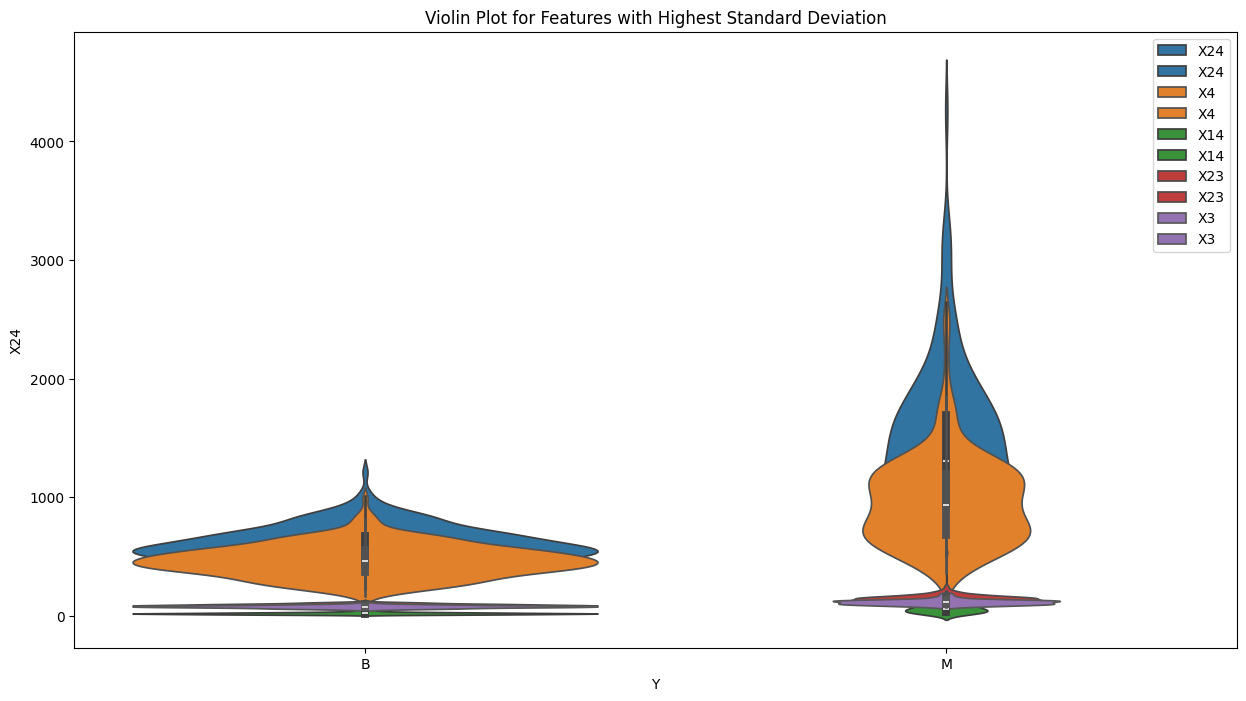

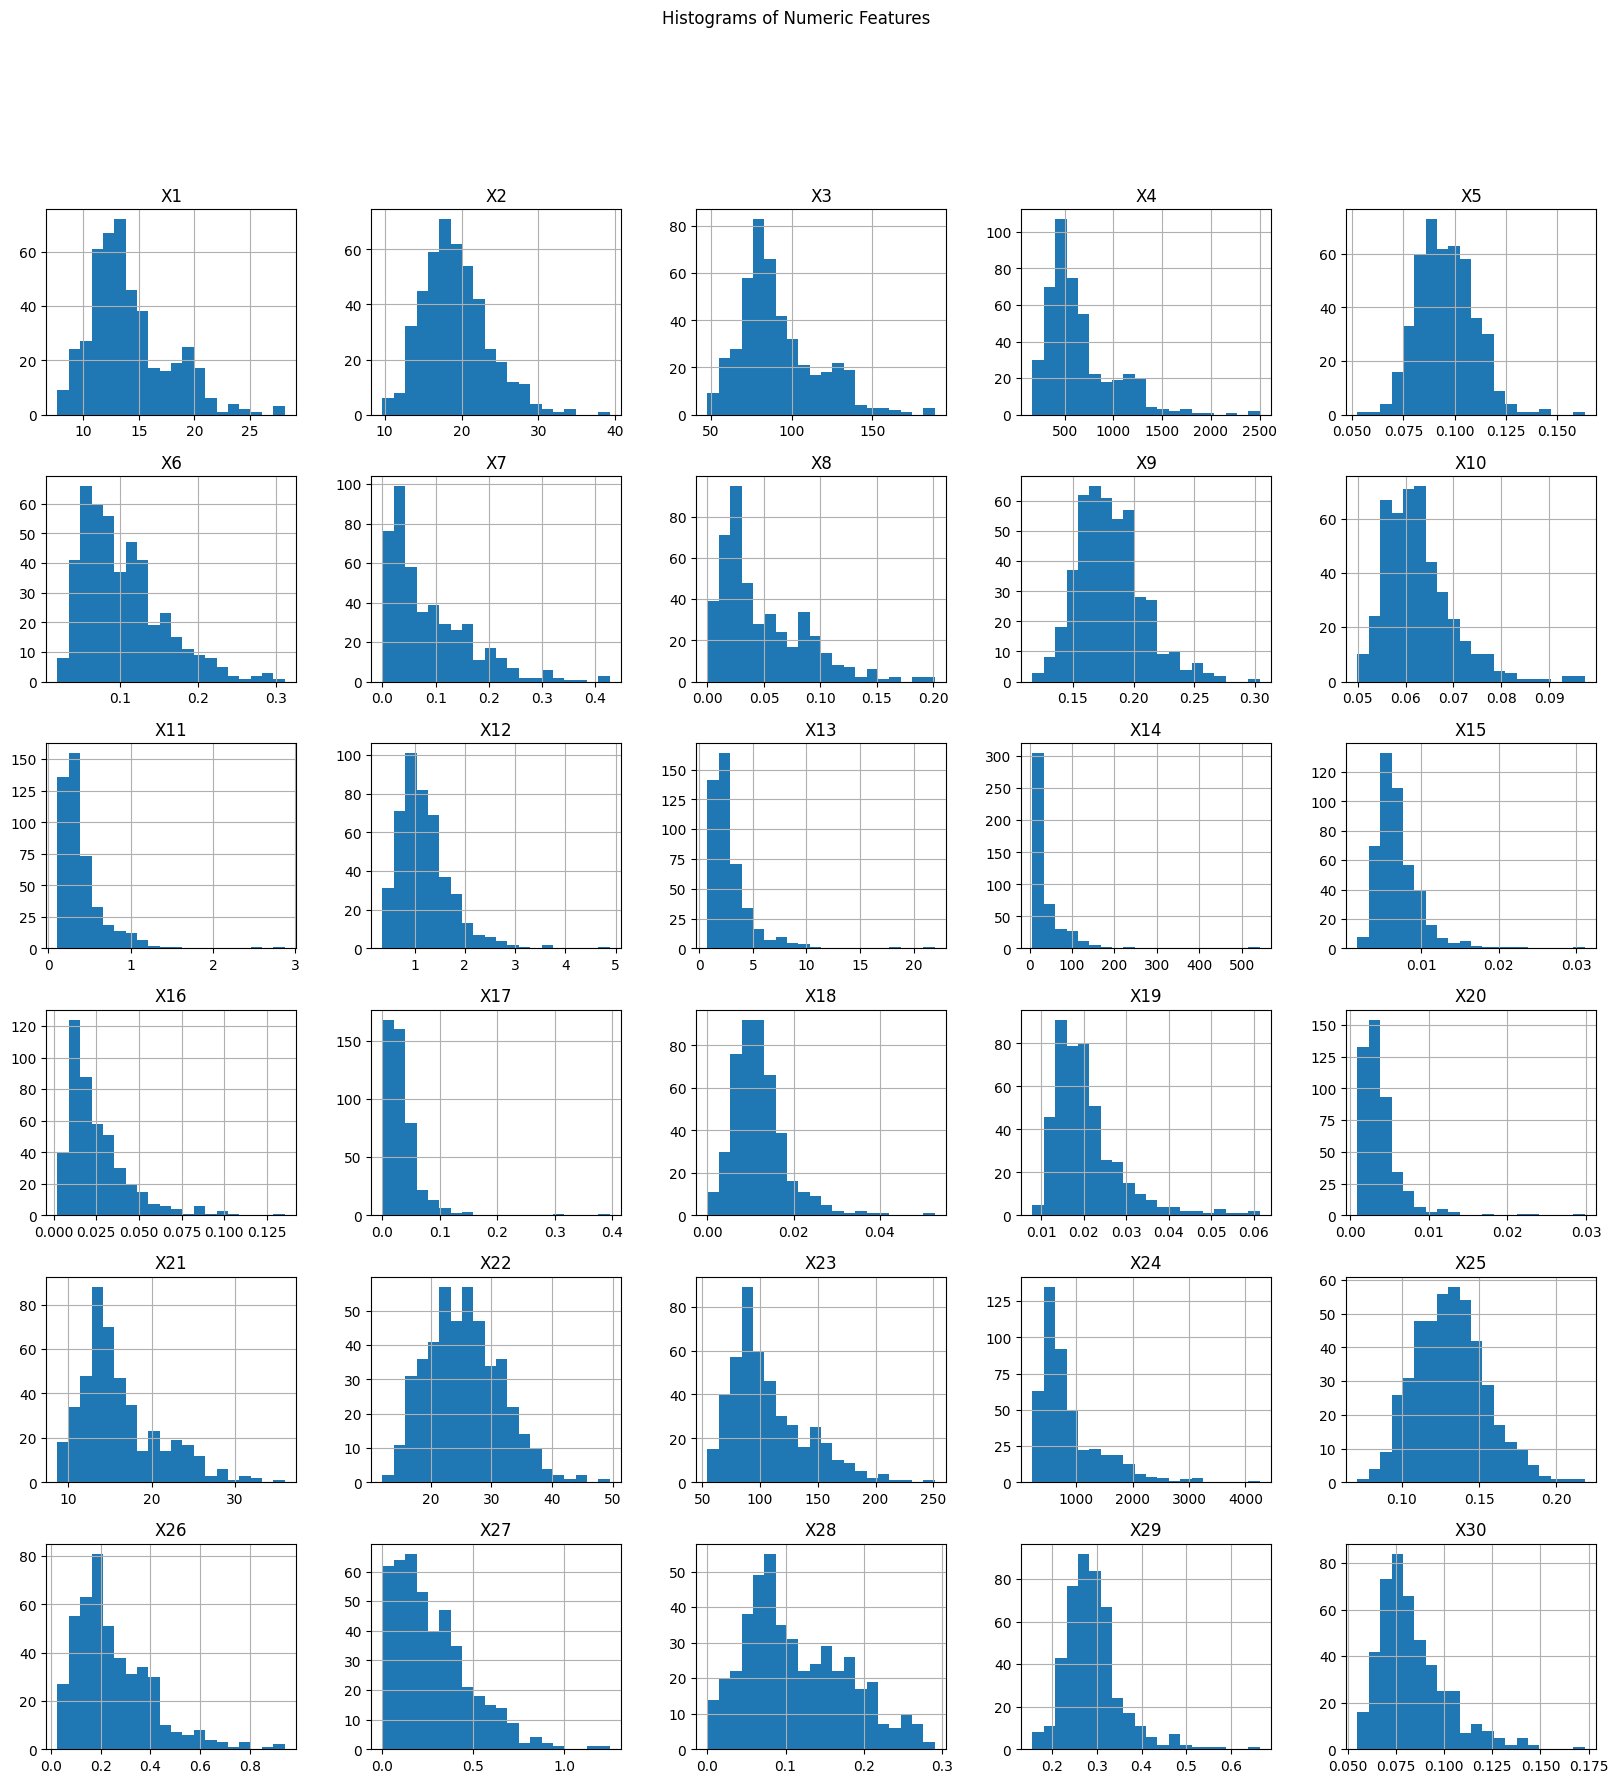

Test Accuracy: 0.9230769230769231
Confusion Matrix:
[[63  2]
 [ 5 21]]
Precision: 0.9130434782608695
Recall: 0.8076923076923077
F-score: 0.8571428571428572


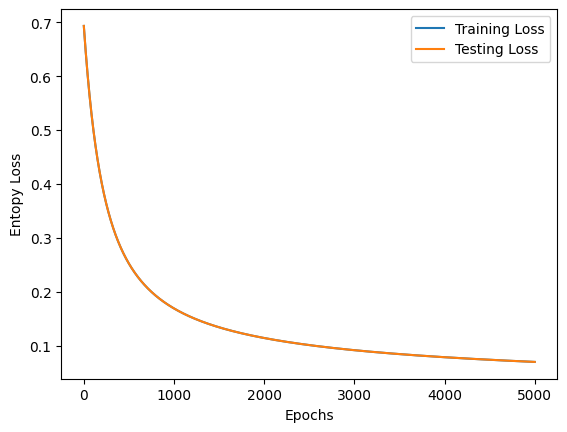

In [11]:
df = pd.read_csv('logistic.csv', header=0, index_col=None)

# Split the dataset into 80% for training and 20% for test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Explore the dataset and visualize distribution of features
train_df.describe()
# Visualize distribution using Violin plot for the 5 features with the highest standard deviation
features_with_highest_std = train_df.drop(columns=['Y'], inplace=False).std().sort_values(ascending=False).head(5).index
plt.figure(figsize=(15, 8))
for feature in features_with_highest_std:
    sns.violinplot(x="Y", y=feature, data=train_df, label=feature)
plt.title("Violin Plot for Features with Highest Standard Deviation")
plt.legend()
plt.show()

train_df.drop(columns=['Y'], inplace=False).hist(figsize=(20, 20), bins=20)
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Remove outliers using z-score method
threshold = 3
columns = np.copy(train_df.iloc[:,1:].columns)
for feature in columns:
    # Calculate mean and standard deviation
    mean = train_df[feature].mean()
    std_dev = train_df[feature].std()

    # Calculate z-scores
    z_scores = (train_df[feature] - mean) / std_dev

    # Identify and remove outliers
    train_df = train_df[np.abs(z_scores) <= threshold]

columns = np.copy(test_df.iloc[:,1:].columns)
for feature in columns:
    # Calculate mean and standard deviation
    mean = test_df[feature].mean()
    std_dev = test_df[feature].std()

    # Calculate z-scores
    z_scores = (test_df[feature] - mean) / std_dev

    # Identify and remove outliers
    test_df = test_df[np.abs(z_scores) <= threshold]

# Reset index after appending
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Assuming 'Y' contains 'B' and 'M'
# Use LabelEncoder to map 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
train_df['Y'] = label_encoder.fit_transform(train_df['Y'])
test_df['Y'] = label_encoder.transform(test_df['Y'])

# Perform standard scaling
scaler = StandardScaler()
X_train = train_df.iloc[:, 1:].values
y_train = train_df['Y'].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df['Y'].values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression class using CrossEntropyLoss and NewtonOptimizer
class LogisticRegression:
    def __init__(self, x, y, x_test, y_test,epochs=5000):
        self.x = np.hstack((np.ones((x.shape[0], 1)), x))  # Add a column of ones for the bias term
        self.y = y.reshape(-1, 1)
        self.x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) 
        self.y_test = y_test.reshape(-1, 1)
        self.epochs = epochs
        self.theta = np.zeros((self.x.shape[1], 1))

    def fit(self):
        self.optimizer = Optimization(self.x, self.y, self.x_test, self.y_test)
        self.theta = self.optimizer.newtons_method(self.theta, self.epochs)

    def predict(self, X):
        X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
        predictions = self.optimizer.loss.sigmoid(np.dot(X_with_intercept, self.theta))
        return (predictions >= 0.5).astype(int)

# Instantiate Logistic Regression model
logistic_reg = LogisticRegression(X_train, y_train, X_test, y_test)
logistic_reg.fit()

# Make predictions on test set
y_pred_test = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(test_df['Y'], y_pred_test)
conf_matrix = confusion_matrix(test_df['Y'], y_pred_test)
precision, recall, fscore, _ = precision_recall_fscore_support(test_df['Y'], y_pred_test, average='binary')

# Print results
print(f"Test Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

# Plot the loss trajectory for both training and testing datasets
plt.plot(logistic_reg.optimizer.loss.history_train, label='Training Loss')
plt.plot(logistic_reg.optimizer.loss.history_test, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Entopy Loss')
plt.legend()
plt.show()

**Point to Ponder**


Read about precision, recall and F-score. Suppose model A and model B both have same accuracy, but model B has a higher F-score, which model would be suited? 

<img src='PRA.png' width="50%" height="50%" />

<img src='f-score.png' width="50%" height="50%" />


Precision, recall, and F-score are metrics commonly used to evaluate the performance of classification models. Let's briefly define each of these metrics:

Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positives.
It measures the accuracy of the positive predictions made by the model.


Recall (Sensitivity or True Positive Rate):

Recall is the ratio of correctly predicted positive observations to all actual positives.
It measures the model's ability to capture all positive instances.


F-score (F1 Score):

The F-score is the harmonic mean of precision and recall.
It provides a balance between precision and recall, especially when there is an imbalance between classes.

If model B has a higher F-score while maintaining the same accuracy as model A, it indicates that model B has a better balance between precision and recall. This is generally preferred, especially in scenarios where both false positives and false negatives are important.

The F-score considers both false positives and false negatives, providing a more comprehensive assessment of the model's performance. A higher F-score suggests that the model is effective in both minimizing false positives and capturing most of the true positives.

In summary, if accuracy is the same, choose the model with a higher F-score, as it indicates a better trade-off between precision and recall.

### Part 4

**Discriminant Analysis**

In this part of the assignment you will implement linear and quadratic discriminant analysis classifiers on the iris dataset *from scratch*. Again, this should follow an object oriented method of implementation where you need 2 classes $\textbf{LDA()}$ and $\textbf{QDA()}$ with the associated $\textbf{fit()}$ and $\textbf{predict()}$ methods.


In [12]:
### Write your code here

iris = datasets.load_iris()

df_iris = pd.DataFrame(np.hstack([iris.data,iris.target[...,np.newaxis]]),columns=['X1', 'X2', 'X3', 'X4', "Y"])

class LDA:
    def __init__(self):
        self.mean_class0 = None
        self.mean_class1 = None
        self.shared_covariance = None
        self.prior_class0 = None
        self.prior_class1 = None

    def fit(self, X, y):
        X_class0 = X[y == 0]
        X_class1 = X[y == 1]

        self.mean_class0 = np.mean(X_class0, axis=0)
        self.mean_class1 = np.mean(X_class1, axis=0)

        self.shared_covariance = (np.cov(X_class0.T) + np.cov(X_class1.T)) / 2.0

        self.prior_class0 = len(X_class0) / len(X)
        self.prior_class1 = len(X_class1) / len(X)

    def predict(self, X):
        # LDA decision rule: g(x) = argmax(log(p(x|class)) + log(p(class)))
        decision_function_class0 = np.dot(X, np.linalg.solve(self.shared_covariance, self.mean_class0)) - \
                                   0.5 * np.dot(self.mean_class0, np.linalg.solve(self.shared_covariance, self.mean_class0)) + \
                        np.log(self.prior_class0)

        decision_function_class1 = np.dot(X, np.linalg.solve(self.shared_covariance, self.mean_class1)) - \
                                   0.5 * np.dot(self.mean_class1, np.linalg.solve(self.shared_covariance, self.mean_class1)) + \
                        np.log(self.prior_class1)

        predictions = (decision_function_class1 > decision_function_class0).astype(int)
        return predictions


class QDA:
    def __init__(self):
        self.mean_class0 = None
        self.mean_class1 = None
        self.covariance_class0 = None
        self.covariance_class1 = None
        self.prior_class0 = None
        self.prior_class1 = None

    def fit(self, X, y):
        X_class0 = X[y == 0]
        X_class1 = X[y == 1]

        self.mean_class0 = np.mean(X_class0, axis=0)
        self.mean_class1 = np.mean(X_class1, axis=0)

        self.covariance_class0 = np.cov(X_class0.T)
        self.covariance_class1 = np.cov(X_class1.T)

        self.prior_class0 = len(X_class0) / len(X)
        self.prior_class1 = len(X_class1) / len(X)

    def predict(self, X):
        # QDA decision rule: g(x) = argmax(log(p(x|class)) + log(p(class)))
        decision_function_class0 = -0.5 * np.log(np.linalg.det(self.covariance_class0)) - \
                                   0.5 * np.sum(np.dot((X - self.mean_class0), np.linalg.inv(self.covariance_class0)) * (X - self.mean_class0), axis=1) + \
                    np.log(self.prior_class0)

        decision_function_class1 = -0.5 * np.log(np.linalg.det(self.covariance_class1)) - \
                                   0.5 * np.sum(np.dot((X - self.mean_class1), np.linalg.inv(self.covariance_class1)) * (X - self.mean_class1), axis=1) + \
                    np.log(self.prior_class1)

        predictions = (decision_function_class1 > decision_function_class0).astype(int)
        return predictions


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 1).astype(int)  # Consider only classes 0 and 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit LDA model
lda_model = LDA()
lda_model.fit(X_train, y_train)
lda_predictions = lda_model.predict(X_test)
# Instantiate and fit QDA model
qda_model = QDA()
qda_model.fit(X_train, y_train)
qda_predictions = qda_model.predict(X_test)

# Evaluate accuracy
lda_accuracy = accuracy_score(y_test, lda_predictions)
qda_accuracy = accuracy_score(y_test, qda_predictions)

# Display results
print(f"LDA Accuracy: {lda_accuracy}")
print(f"QDA Accuracy: {qda_accuracy}")

LDA Accuracy: 0.8333333333333334
QDA Accuracy: 0.9


**Evaluation**

Compare your implementation with those of sklearn Library, both in terms of accuracy and timing. Visualize all comparisons in a meaningful manner.

LDA Accuracy: 0.8333333333333334
QDA Accuracy: 0.9


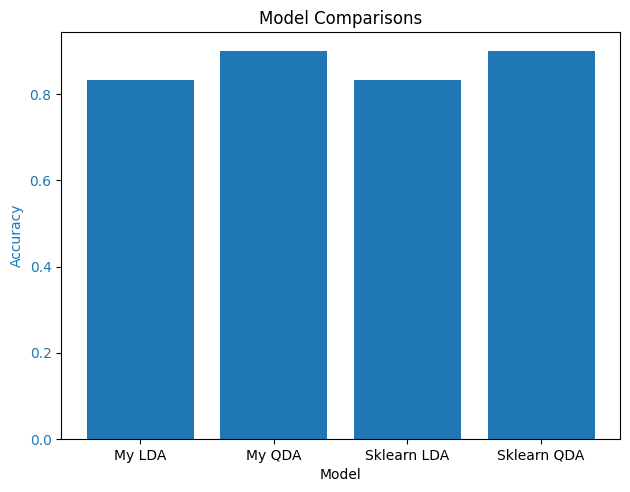

In [13]:
### Write your code here
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
# Measure the time and accuracy of scikit-learn's LDA
sklearn_lda_model = LinearDiscriminantAnalysis()
sklearn_lda_model.fit(X_train, y_train)
sklearn_lda_predictions = sklearn_lda_model.predict(X_test)
sklearn_lda_accuracy = accuracy_score(y_test, sklearn_lda_predictions)

# Measure the time and accuracy of scikit-learn's QDA
sklearn_qda_model = QuadraticDiscriminantAnalysis()
sklearn_qda_model.fit(X_train, y_train)
sklearn_qda_predictions = sklearn_qda_model.predict(X_test)
sklearn_qda_accuracy = accuracy_score(y_test, sklearn_qda_predictions)
print(f"LDA Accuracy: {sklearn_lda_accuracy}")
print(f"QDA Accuracy: {sklearn_qda_accuracy}")

data = {
    'Model': ['My LDA', 'My QDA', 'Sklearn LDA', 'Sklearn QDA'],
    'Accuracy': [lda_accuracy, qda_accuracy, sklearn_lda_accuracy, sklearn_qda_accuracy],
}
df = pd.DataFrame(data)

# Visualize comparisons
fig, ax = plt.subplots()

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy', color='tab:blue')
ax.bar(df['Model'], df['Accuracy'], color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Model Comparisons')
plt.show()